# **Lab 3(a)**
# Neural Networks


---


Total Points: **85**

Tentative Weightage : **2%**

Submission Deadline :  **25th March 2021, 23:59 hours**

Link to the dataset: https://drive.google.com/file/d/1G12DoncT43hYmA72ZyY2xhyukrhnDTBn/view?usp=sharing

---



General Instructions:

---



1. You have to do this lab individually
2. You may use **sklearn, seaborn, matplotlib, pandas, Tensorflow 2.x**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. Make sure to begin early as a few experiments may consume more time to run.
6. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/)
7. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
8. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
9. You are expected to submit your **inferences** (preferably in a text block) and not just an error free code.
10. Students are expected to follow the **honor code** of the class.
11. In case of any queries regarding Lab 3, please mail 2019aim1003@iitrpr.ac.in


In [ ]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

import shutil
import random

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
#from google.colab.patches import cv2_imshow

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
# path to the dataset in my drive /content/drive/MyDrive/CS503_Lab3a/CR-Dataset

In [ ]:
IMG_HEIGHT = 40
IMG_WIDTH = 40

# Dataset

The dataset used here is a synthetic alphabet recognition dataset. It consists of images of lowercase English alphabets, generated with handwritten-fonts. All images are single channel (grayscale) and have size 40 * 40. <br>

The dataset has the following directory structure:

<pre>
<b>CR-Dataset</b>
|__ <b>train</b>
    |______ <b>a</b>: [a_1.png, a_2.png, a_3.png ....]
    |______ <b>b</b>: [b_1.png, b_2.png, b_3.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_1.png, y_2.png, y_3.png ....]    
    |______ <b>z</b>: [z_1.png, z_2.png, z_3.png ....]   
    
|__ <b>validation</b>
    |______ <b>a</b>: [a_221.png, a_322.png, a_353.png ....]
    |______ <b>b</b>: [b_241.png, b_352.png, b_363.png ....]
        .
        .
        .
    |______ <b>y</b>: [y_221.png, y_322.png, y_353.png ....]
    |______ <b>z</b>: [z_241.png, z_352.png, z_363.png ....]
    
|__ <b>test</b>: [a_521.png, b_272.png, g_433.png ....]
</pre>
*Note:* The file names are for representation only, they may differ in the original dataset.<br>


Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [ ]:
#Add the paths for train, validation and test directories
train_dir_path="/home/bhoopen/Desktop/lab_3a/CR-Dataset/Train"
validation_dir_path="/home/bhoopen/Desktop/lab_3a/CR-Dataset/Validation"
test_dir_path="/home/bhoopen/Desktop/lab_3a/CR-Dataset/Test"
#train_dir_path="/content/drive/MyDrive/CS503_Lab3a/CR-Dataset/Train/"
#validation_dir_path="/content/drive/MyDrive/CS503_Lab3a/CR-Dataset/Validation/"
#test_dir_path="/content/drive/MyDrive/CS503_Lab3a/CR-Dataset/Test/"

# Generate Image Batches


---


Fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**3 Points**

---




`tensorflow.keras.preprocessing.image.ImageDataGenerator` object helps us use all the functionalities of the ImageDataGenerator class and the important arguments which can be given during the instantiation of this object are -

1) **rotation_range** - Degree between (0,360) with which to randomly rotate the image so as to train the model  

2) **width_shift and height_shift** are ranges within which to randomly translate pictures vertically or horizontally.

3) **rescale** is to rescale the coloured data which may have values between (0, 255) to between (0, 1) so that the computation can be easy and cheap, so for this we just divide every pixel by 255.

4) **shear_range** is for randomly applying shearing transformations.

5) **zoom_range** randomly zooms inside pictures.

6) **horizontal_flip** is for randomly flipping half of the images horizontally so as to introduce some amount of orginality in the data as real data is not always horizontally symmetrical.

7) **zca_whitening**	Boolean value. Apply ZCA whitening.

8) **zca_epsilon**	Epsilon for ZCA whitening. Default value is 1e-6.

9) **samplewise_std_normalization**	Boolean value. Divide each input by its std.

10) **featurewise_std_normalization**	Boolean value. Divide inputs by std of the dataset, feature-wise.

11) **featurewise_center**	Boolean value. Set input mean to 0 over the dataset, feature-wise.

12) **samplewise_center**	Boolean value. Set each sample mean to 0.

13) **preprocessing_function**	This function is applied to each input.

14) **validation_split**	Floating point number. Fraction of images reserved for validation (strictly between 0 and 1).

15) **dtype**	Datatype used for generating arrays.

16) **vertical_flip** is for randomly flipping half of the images vertically.

Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**

---

`tensorflow.keras.preprocessing.image.ImageDataGenerator.flow_from_directory()` function has the following important arguments - 

1) **directory** - This is set to the path where the classes of folders are present.

2) **target_size** is the size of your input images, every image will be resized to this size.

3) **color_mode** if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.

4) **batch_size** - No. of images to be yielded from the generator per batch.

5) **class_mode** - Type of classification task you are doing, if classifying between 2 classes then type "binary" and if the classification task consists of more than 2 classes, then use "categorical" as the input to this argument. 

6) **shuffle** - Shuffles the order of the images generated.

7) **seed** - Seed is applied so that everytime we use the random seed we get the same output of the random function no matter how many times we execute the code.

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train and validation directories.



---

**3 Points**


---




In [ ]:
def get_generator_from_dir(directory_path, batch_size):
    # Insert your code here
    datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, fill_mode='nearest')
    data_batch_generator=datagen.flow_from_directory(directory=directory_path, target_size=(40, 40), 
                                                     batch_size=batch_size,
                                                     color_mode="grayscale",
                                                     class_mode="categorical")
    
    return data_batch_generator

Describe the arguments of `flow_from_dataframe()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**3 Points**

---

`flow_from_dataframe()` method accepts all the arguments that `flow_from_directory()` method allows, plus some additional arguments which are listed below - 

1) **dataframe** - Pandas DataFrame which contains the filenames and classes or numeric data to be treated as target values.

2) **directory** - Path to the folder which contains all the images,None if x_col contains absolute paths pointing to each image instead of just filenames.

3) **x_col** - The column in the dataframe that has the filenames of the images

4) **y_col** - The column/columns in the dataframe in the filename that will be treated as raw target values if class_mode=”raw” (useful for regression tasks) or they will be treated as name of the classes if class_mode is “binary”/”categorical” or they will be ignored if class_mode is “input”/None.

5) **class_mode** - In addition to all the class_modes previously available in flow_from_directory, there is “raw”.

6) **drop_duplicates** - Boolean, whether to drop duplicate rows based on filename,True by default.




Create a function that returns a generator object which shall fetch batches of images from the specified directory using a dataframe that has information about images and their labels. This function shall be reused for fetching images from test directory.



---

**3 Points**


---




In [ ]:
def get_generator_from_dataframe(directory_path, dataframe, batch_size):
    # Insert your code here
    datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, fill_mode='nearest')
    data_batch_generator=datagen.flow_from_dataframe(directory=directory_path, dataframe=dataframe, x_col='Image', y_col='Label', target_size=(40, 40), 
                                                     batch_size=batch_size,
                                                     color_mode="grayscale",
                                                     class_mode="categorical")

    return data_batch_generator

Create a function that returns a dataframe having image file names and their corresponding class labels for a folder. This will help in creating generator from a dataframe.



---

**2 Points**


---




In [ ]:
import pandas as pd

def get_dataframe(folder_name):
    
    # Insert code to give you list of all the image files in folder
    file_names=[]
    for root, dirs, files in os.walk(folder_name):
        for name in files:
            file_names.append(name)
    # Insert code to get list of labels from list of images 
    # (Hint: every image file name has its label name as prefix)
    label_names = []
    for name in file_names:
        label_names.append(name[0])
    # Make a dataframe with two columns - Image(file name) and Label (class label)
    df = pd.DataFrame(list(zip(file_names, label_names)), columns=['Image', 'Label'])
    # display and return the dataframe
    print(df)
    return df
    

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[3 Points]**

> add() function takes only one argument and that is the layer which we want to input into the model, for example `keras.Sequential.add(tf.keras.layers.Dense(8))` will add a dense layer with 8 neurons to the overall model and in the layers are added in the same sequence as we use the function add().

2. compile() **[3 Points]**

> compile() function is used to compile the overall model developed and in this we mention all the other details of the model, like which optimizer, loss function, metrics, etc. we will be using.

> Its arguments are - 1) **optimizer** - specify the kind of optimizer we want to use, ex-adam, rmsprop.
  2)  **loss** - specify the kind of loss function we use to find the loss, like squared_loss or absolute_loss.
  3) **metrics** - used to specify the kinds of metrics we use to evaluate the model, like ['accuracy'] so that if the value of the metric is higher, we consider it to be better performing.
  4) **weighted_matrices** - list of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
  

3. fit() **[3 Points]**

> This function is used to train the dataset using the the given model for the specified number of epochs.

> Its important arguments are -   1) **x** - the input data on which to train the model.
  2) **y** - the true labels of the data, so that our model learnt outputs very close to this.
  3) **batch_size** - the size of the batch of datapoints used for one gradient update.
    4) **epochs** - number of epochs for which we have to train the model.
    5) **validation_split** - this is the fraction of the training data to be used as validation data, in case there is no seperate validation data available.
    6) **validation_data** - data on which the validation is to be performed based on the metrics defined at the end of each epoch. 


4. predict()  **[3 Points]**

> This function is used to predict the output of the model on the data provide by its x argument.

> Important arguments of this function are -1) **x** - the input data on which we have to predict the output.
2) **batch_size** - the number of samples datapoints to be processed at a time.
3) **steps** - total number of steps to do/ total number of batches to test on before giving the final prediction.
4) **use_multiprocessing** - boolean value which tells whether to use multhreading to perform the evaluation/prediction task faster. 



Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[3 Points]**

> Conv2D() adds a convolutional layer of custom size and apply a custom sized kernel to it. Important arguments are - 1) **filters** -  the dimensions of the output 4D tensor.
2) **kernel_size** - The tuple consisting of the height and width of the kernel applied to the input layer.
3) **padding** - The type of padding to be applied to the input layer. can be *same* or *valid*.
4) **stride** - A list of 2 integers, specifying the strides of the convolution along the height and width.
5) **activation** - the kind of activation function to be used.
6) **use_bias** - boolean value to indicate whether or not to apply bias to the model.


2. MaxPooling2D() **[3 Points]**

> `MaxPooling2D()` is used to apply max pooling layer to the input tensor.
Its important arguments are - 
1)**pool_size** - A tuple which tells us the window size over which we have to take the maximum value.
2)**strides** - The value of the stride to take, i.e. the number of cells to move ahead at a time while doing the maxpool.
3)**padding** - the type of padding to be applied to the input layer. 
4)**data_format** - if it is set to **channels_first**, then the input 4d tensor will have the shape **(batch_size, channels, rows, cols)**, else if it is **channels_last** then the input shape is **(batch_size, rows, cols, channels)**. The ouput will also have the same shape as the input.

3. Flatten()  **[3 Points]**

> This layer just converts the 4D input tensor to a flat layer of only one dimension, or we can say it converts the 4D tensor to a vector. As the input tensor can have different data_format values we provide it to the Flatten() layer using the **data_format** argument. Its functioning is mentioned above. 

4. Dense()  **[3 Points]**

> It is just adds a densely connected nueral network layer. Important arguments are - 
1)**units** - the dimensions of the output vector.
2)**activation** - the activation function to apply during forming the layer.
3)**use_bias** - boolean value which tells whether or not to use a bias vector in the layer.
4)**kernel_initializer** - Initializer for the kernel weights matrix.
5)**bias_initializer** -
Initializer for the bias vector.
6)**kernel_regularizer** -
Regularizer function applied to the kernel weights matrix.
7)**bias_regularizer** -
Regularizer function applied to the bias vector.

5. Dropout() **[3 Points]**

> This function applies dropout mechanism to the nuerons in the feed-forward pass. Its main arguments are - 
1)**rate** - the fractional value between 0 and 1 which tells us the fraction of input units to drop during the training process.
2)**seed** - the integer value of the random seed.
3)**noise_shape** - the 1D tensor representing the shape of the binary dropout mask that will be multiplied with the input.
 


# Defining the model architecture

---



We have defined our prediction model architecture here. **Please dont make any changes to the two blocks below.**

In [ ]:
def build_model(dropout_probability = 0,LR=1e-4):
    
    # Creating a Keras sequential model
    model = tf.keras.models.Sequential()
    
    # Adding layers 
    model.add(tf.keras.layers.Flatten(input_shape=(IMG_WIDTH,IMG_HEIGHT, 1)))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='relu',kernel_initializer='glorot_uniform'))
    model.add(tf.keras.layers.Dense(512, activation='tanh',kernel_initializer='he_uniform',))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(26,activation='softmax'))
    
    # Optimizers, loss function and performance metrics
    opt = tf.keras.optimizers.Adam(learning_rate=LR)
    cat_loss = tf.keras.losses.CategoricalCrossentropy()
    acc_metrics = [tf.keras.metrics.CategoricalAccuracy()]
    
    # Compiling the model
    model.compile(optimizer=opt, loss=cat_loss, metrics=acc_metrics)
    
    return model

In [ ]:
#  Variables needed for subsequent sections
num_epochs = 40

labels=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

# Best Learning Rate determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are learning rate of the optimizer, batch size and dropout probability. We shall start with the  experimentation of **learning rate**. Discuss the impact of learning rate on model training and performance.


---
**5 Points**


---




In [ ]:
def determine_best_learning_rate():
    learning_rates = [1e-3,1e-4,1e-5]
    avg_val_accuracies = []

    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    datagen_tr = get_generator_from_dir(train_dir_path, 16)
    datagen_val = get_generator_from_dir(validation_dir_path, 16)    
    
    for l_rate in learning_rates:
        
        # Insert your code here to build a model with the current learning rate
        model = build_model(LR=l_rate)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        h=model.fit(datagen_tr, validation_data=datagen_val, epochs=num_epochs)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        avg_val_accuracies.append(np.mean(h.history['val_categorical_accuracy']))

    # Insert your code here to figure out the learning rate which gives the highest average validation accuracy. Print the value and return it.
    best_val_acc = max(avg_val_accuracies)
    best_LR_i=0
    for i, val_acc in enumerate(avg_val_accuracies):
        if(val_acc==best_val_acc):
            best_LR_i=i
            break
    print(learning_rates[best_LR_i])
    return learning_rates[best_LR_i]


# determine_best_learning_rate() is being called here
best_lr = determine_best_learning_rate()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/40
1264/1264 [==============================] - 13s 10ms/step - loss: 3.4540 - categorical_accuracy: 0.0384 - val_loss: 3.4116 - val_categorical_accuracy: 0.0348
Epoch 2/40
1264/1264 [==============================] - 11s 9ms/step - loss: 3.4031 - categorical_accuracy: 0.0360 - val_loss: 3.3637 - val_categorical_accuracy: 0.0401
Epoch 3/40
1264/1264 [==============================] - 12s 9ms/step - loss: 3.4143 - categorical_accuracy: 0.0409 - val_loss: 3.3611 - val_categorical_accuracy: 0.0374
Epoch 4/40
1264/1264 [==============================] - 12s 9ms/step - loss: 3.4042 - categorical_accuracy: 0.0391 - val_loss: 3.3578 - val_categorical_accuracy: 0.0374
Epoch 5/40
1264/1264 [==============================] - 12s 10ms/step - loss: 3.4055 - categorical_accuracy: 0.0361 - val_loss: 3.4445 - val_categorical_accuracy: 0.0294
Epoch 6/40
1264/1264 [==============================] - 13s 10ms/st

Epoch 9/40
1264/1264 [==============================] - 12s 9ms/step - loss: 0.0673 - categorical_accuracy: 0.9818 - val_loss: 0.0399 - val_categorical_accuracy: 0.9920
Epoch 10/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.0502 - categorical_accuracy: 0.9882 - val_loss: 0.1188 - val_categorical_accuracy: 0.9519
Epoch 11/40
1264/1264 [==============================] - 10s 8ms/step - loss: 0.0471 - categorical_accuracy: 0.9886 - val_loss: 0.0888 - val_categorical_accuracy: 0.9733
Epoch 12/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.0372 - categorical_accuracy: 0.9903 - val_loss: 0.0196 - val_categorical_accuracy: 1.0000
Epoch 13/40
1264/1264 [==============================] - 10s 8ms/step - loss: 0.0277 - categorical_accuracy: 0.9934 - val_loss: 0.0292 - val_categorical_accuracy: 0.9866
Epoch 14/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0310 - categorical_accuracy: 0.9919 - val_loss: 0.0108 - val_categorica

1264/1264 [==============================] - 11s 9ms/step - loss: 0.3961 - categorical_accuracy: 0.9295 - val_loss: 0.4673 - val_categorical_accuracy: 0.9144
Epoch 18/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.3526 - categorical_accuracy: 0.9392 - val_loss: 0.4117 - val_categorical_accuracy: 0.9251
Epoch 19/40
1264/1264 [==============================] - 10s 8ms/step - loss: 0.3127 - categorical_accuracy: 0.9513 - val_loss: 0.3980 - val_categorical_accuracy: 0.9251
Epoch 20/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.2749 - categorical_accuracy: 0.9579 - val_loss: 0.3544 - val_categorical_accuracy: 0.9358
Epoch 21/40
1264/1264 [==============================] - 10s 8ms/step - loss: 0.2432 - categorical_accuracy: 0.9670 - val_loss: 0.2950 - val_categorical_accuracy: 0.9652
Epoch 22/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.2157 - categorical_accuracy: 0.9724 - val_loss: 0.2809 - val_categorical_accuracy:

In [ ]:
print("the best learning rate = "+str(best_lr))

the best learning rate = 0.0001


# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---

In [ ]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []


    # Insert your code here to get generators that fetch batches from train and validation directories (use batch size 16)
    datagen_tr = get_generator_from_dir(train_dir_path, 16)
    datagen_val = get_generator_from_dir(validation_dir_path, 16)

    for prob in dropout_probs:
        
        
        # Insert your code here to build a model with the current dropout probability
        model = build_model(dropout_probability=prob)

        # Insert your code here to train the model using the training set and validate using the validation set
        h=model.fit(datagen_tr, validation_data=datagen_val, epochs=num_epochs)
       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        avg_val_accuracies.append(np.mean(h.history['val_categorical_accuracy']))

    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    best_val_acc = max(avg_val_accuracies)
    best_prob_i=0
    for i, val_acc in enumerate(avg_val_accuracies):
        if(val_acc==best_val_acc):
            best_prob_i=i
            break
    print(dropout_probs[best_prob_i])
    return dropout_probs[best_prob_i]


    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/40
1264/1264 [==============================] - 12s 9ms/step - loss: 2.5484 - categorical_accuracy: 0.2665 - val_loss: 1.4641 - val_categorical_accuracy: 0.6043
Epoch 2/40
1264/1264 [==============================] - 11s 9ms/step - loss: 1.1817 - categorical_accuracy: 0.6642 - val_loss: 0.8496 - val_categorical_accuracy: 0.7781
Epoch 3/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.6059 - categorical_accuracy: 0.8414 - val_loss: 0.5008 - val_categorical_accuracy: 0.8770
Epoch 4/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.3350 - categorical_accuracy: 0.9158 - val_loss: 0.3279 - val_categorical_accuracy: 0.9171
Epoch 5/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.1978 - categorical_accuracy: 0.9539 - val_loss: 0.1979 - val_categorical_accuracy: 0.9492
Epoch 6/40
1264/1264 [==============================] - 11s 9ms/step 

1264/1264 [==============================] - 11s 9ms/step - loss: 0.1131 - categorical_accuracy: 0.9726 - val_loss: 0.1266 - val_categorical_accuracy: 0.9599
Epoch 9/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0976 - categorical_accuracy: 0.9726 - val_loss: 0.0723 - val_categorical_accuracy: 0.9786
Epoch 10/40
1264/1264 [==============================] - 12s 9ms/step - loss: 0.0679 - categorical_accuracy: 0.9817 - val_loss: 0.0997 - val_categorical_accuracy: 0.9679
Epoch 11/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0696 - categorical_accuracy: 0.9799 - val_loss: 0.0383 - val_categorical_accuracy: 0.9920
Epoch 12/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0461 - categorical_accuracy: 0.9881 - val_loss: 0.0651 - val_categorical_accuracy: 0.9840
Epoch 13/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0389 - categorical_accuracy: 0.9900 - val_loss: 0.0591 - val_categorical_accuracy: 

1264/1264 [==============================] - 13s 10ms/step - loss: 0.0510 - categorical_accuracy: 0.9847 - val_loss: 0.0218 - val_categorical_accuracy: 0.9893
Epoch 17/40
1264/1264 [==============================] - 12s 9ms/step - loss: 0.0598 - categorical_accuracy: 0.9808 - val_loss: 0.0585 - val_categorical_accuracy: 0.9947
Epoch 18/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0542 - categorical_accuracy: 0.9834 - val_loss: 0.0222 - val_categorical_accuracy: 0.9947
Epoch 19/40
1264/1264 [==============================] - 12s 9ms/step - loss: 0.0474 - categorical_accuracy: 0.9856 - val_loss: 0.0255 - val_categorical_accuracy: 0.9866
Epoch 20/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0406 - categorical_accuracy: 0.9878 - val_loss: 0.0232 - val_categorical_accuracy: 0.9973
Epoch 21/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0537 - categorical_accuracy: 0.9835 - val_loss: 0.0850 - val_categorical_accuracy

1264/1264 [==============================] - 11s 9ms/step - loss: 0.0629 - categorical_accuracy: 0.9801 - val_loss: 0.0276 - val_categorical_accuracy: 0.9973
Epoch 25/40
1264/1264 [==============================] - 12s 10ms/step - loss: 0.0589 - categorical_accuracy: 0.9815 - val_loss: 0.0463 - val_categorical_accuracy: 0.9813
Epoch 26/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0549 - categorical_accuracy: 0.9821 - val_loss: 0.0366 - val_categorical_accuracy: 0.9866
Epoch 27/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0646 - categorical_accuracy: 0.9810 - val_loss: 0.0493 - val_categorical_accuracy: 0.9813
Epoch 28/40
1264/1264 [==============================] - 11s 8ms/step - loss: 0.0561 - categorical_accuracy: 0.9826 - val_loss: 0.0752 - val_categorical_accuracy: 0.9759
Epoch 29/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.0508 - categorical_accuracy: 0.9839 - val_loss: 0.0811 - val_categorical_accuracy

In [ ]:
print("the best dropout probability = "+str(best_prob))

the best dropout probability = 0


# Best Batch Size determination

---


Use the best learning rate and best dropout probablity determined in the previous sections for the subsequent sections. We shall now do experimentation of **batch size** parameter. Discuss the impact of batch size on model performance.


---
**5 Points**


---


In [ ]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    

    for bsize in batch_sizes:
        
        # Insert your code here to build a model with the default dropout probability and learning rate
        model = build_model()
        
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        datagen_tr = get_generator_from_dir(train_dir_path, bsize)
        datagen_val = get_generator_from_dir(validation_dir_path, bsize)
        
        # Insert your code here to train the model using the training set and validate using the validation set
        h=model.fit(datagen_tr, validation_data=datagen_val, epochs=num_epochs)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        avg_val_accuracies.append(np.mean(h.history['val_categorical_accuracy']))

    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    best_val_acc = max(avg_val_accuracies)
    best_size_i=0
    for i, val_acc in enumerate(avg_val_accuracies):
        if(val_acc==best_val_acc):
            best_size_i=i
            break
    print(batch_sizes[best_size_i])
    return batch_sizes[best_size_i]


# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
Epoch 1/40
1264/1264 [==============================] - 11s 8ms/step - loss: 2.5760 - categorical_accuracy: 0.2610 - val_loss: 1.7090 - val_categorical_accuracy: 0.5241
Epoch 2/40
1264/1264 [==============================] - 11s 9ms/step - loss: 1.2385 - categorical_accuracy: 0.6494 - val_loss: 0.8862 - val_categorical_accuracy: 0.7380
Epoch 3/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.6658 - categorical_accuracy: 0.8122 - val_loss: 0.5247 - val_categorical_accuracy: 0.8529
Epoch 4/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.3497 - categorical_accuracy: 0.9170 - val_loss: 0.2640 - val_categorical_accuracy: 0.9385
Epoch 5/40
1264/1264 [==============================] - 11s 9ms/step - loss: 0.1989 - categorical_accuracy: 0.9554 - val_loss: 0.2484 - val_categorical_accuracy: 0.9305
Epoch 6/40
1264/1264 [==============================] - 13s 10ms/step

632/632 [==============================] - 8s 12ms/step - loss: 0.1019 - categorical_accuracy: 0.9833 - val_loss: 0.1104 - val_categorical_accuracy: 0.9813
Epoch 9/40
632/632 [==============================] - 8s 12ms/step - loss: 0.0780 - categorical_accuracy: 0.9866 - val_loss: 0.1111 - val_categorical_accuracy: 0.9733
Epoch 10/40
632/632 [==============================] - 8s 12ms/step - loss: 0.0601 - categorical_accuracy: 0.9897 - val_loss: 0.0522 - val_categorical_accuracy: 0.9866
Epoch 11/40
632/632 [==============================] - 8s 12ms/step - loss: 0.0581 - categorical_accuracy: 0.9881 - val_loss: 0.0524 - val_categorical_accuracy: 0.9920
Epoch 12/40
632/632 [==============================] - 8s 12ms/step - loss: 0.0606 - categorical_accuracy: 0.9856 - val_loss: 0.0844 - val_categorical_accuracy: 0.9759
Epoch 13/40
632/632 [==============================] - 8s 12ms/step - loss: 0.0325 - categorical_accuracy: 0.9933 - val_loss: 0.0251 - val_categorical_accuracy: 1.0000
Epoch

316/316 [==============================] - 6s 20ms/step - loss: 0.0316 - categorical_accuracy: 0.9955 - val_loss: 0.0382 - val_categorical_accuracy: 0.9947
Epoch 17/40
316/316 [==============================] - 6s 20ms/step - loss: 0.0374 - categorical_accuracy: 0.9936 - val_loss: 0.0224 - val_categorical_accuracy: 1.0000
Epoch 18/40
316/316 [==============================] - 6s 20ms/step - loss: 0.0171 - categorical_accuracy: 0.9984 - val_loss: 0.0212 - val_categorical_accuracy: 0.9973
Epoch 19/40
316/316 [==============================] - 6s 20ms/step - loss: 0.0308 - categorical_accuracy: 0.9936 - val_loss: 0.0558 - val_categorical_accuracy: 0.9840
Epoch 20/40
316/316 [==============================] - 6s 20ms/step - loss: 0.0212 - categorical_accuracy: 0.9970 - val_loss: 0.0154 - val_categorical_accuracy: 1.0000
Epoch 21/40
316/316 [==============================] - 7s 21ms/step - loss: 0.0089 - categorical_accuracy: 0.9995 - val_loss: 0.0185 - val_categorical_accuracy: 1.0000
Epoc

In [ ]:
print("the best batch size = "+str(best_batch_size))

the best batch size = 16


# Images Visualization

---


Now we shall train our model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [ ]:
def visualize_image(img):
    # Insert your code here to visualize a given image
    image=cv2.imread(img)
    plt.figure()
    plt.imshow(img, image)


# Make generators ready

---

Create generators to fetch batches from train and validation directory. For test samples, create with the help of get_dataframe() method. You may use best batch size determined earlier.



---
**3 Points**


---




In [ ]:
train_gen=get_generator_from_dir(train_dir_path, best_batch_size)
val_gen=get_generator_from_dir(validation_dir_path, best_batch_size)
df=get_dataframe(test_dir_path)
#printdf['Label'].value_counts()
test_gen=get_generator_from_dataframe(directory_path=test_dir_path, dataframe=df, batch_size=best_batch_size)

Found 20220 images belonging to 26 classes.
Found 374 images belonging to 26 classes.
          Image Label
0    f_1597.png     f
1    h_1851.png     h
2    c_1164.png     c
3      y_19.png     y
4    q_2882.png     q
..          ...   ...
411  i_1966.png     i
412  p_2812.png     p
413  d_1284.png     d
414  g_1709.png     g
415  f_1567.png     f

[416 rows x 2 columns]
Found 416 validated image filenames belonging to 26 classes.


# Class-wise samples Plot

---

Plot the class-wise number of samples present in training, validation and test directory. Also, visualise 5 samples each from train, validation and test directories.



---
**5 Points (3+2)**


---




           Image Label
0      m_490.png     m
1      m_681.png     m
2      m_487.png     m
3      m_385.png     m
4      m_554.png     m
...          ...   ...
20215  y_415.png     y
20216    y_5.png     y
20217  y_161.png     y
20218  y_162.png     y
20219  y_413.png     y

[20220 rows x 2 columns]
          Image Label
0    m_2425.png     m
1    m_2415.png     m
2    m_2474.png     m
3    m_2369.png     m
4    m_2394.png     m
..          ...   ...
369  y_3915.png     y
370    y_16.png     y
371  y_3985.png     y
372  y_3960.png     y
373     y_7.png     y

[374 rows x 2 columns]
          Image Label
0    f_1597.png     f
1    h_1851.png     h
2    c_1164.png     c
3      y_19.png     y
4    q_2882.png     q
..          ...   ...
411  i_1966.png     i
412  p_2812.png     p
413  d_1284.png     d
414  g_1709.png     g
415  f_1567.png     f

[416 rows x 2 columns]


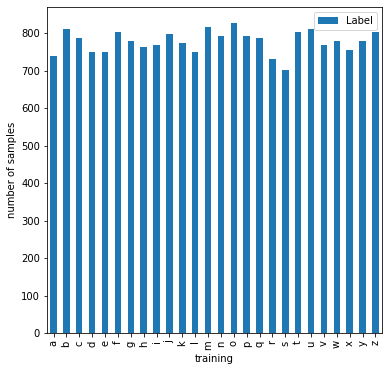

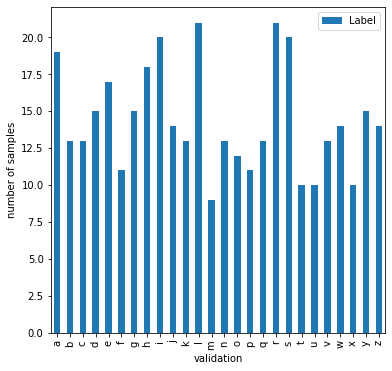

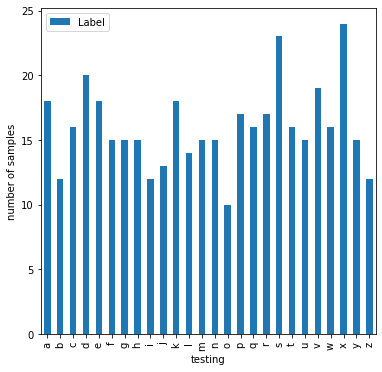

In [ ]:
def sample_plot(df, x_label, y_label="number of samples"):
    dff=pd.DataFrame(df['Label'].value_counts())
    dff=dff.sort_index(axis=0)
    ax=dff.plot.bar(figsize=(6, 6))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

sample_plot(get_dataframe(train_dir_path), x_label="training")
sample_plot(get_dataframe(validation_dir_path), x_label="validation")
sample_plot(get_dataframe(test_dir_path), x_label="testing")

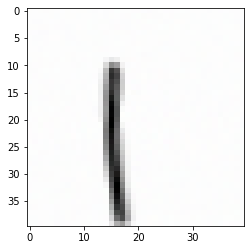

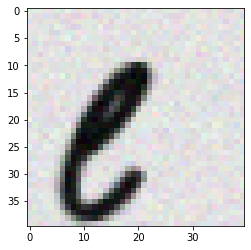

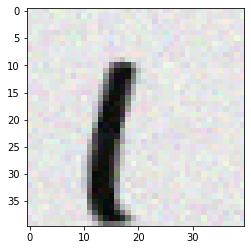

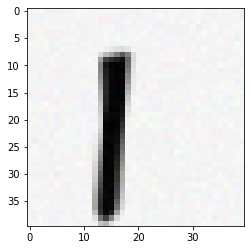

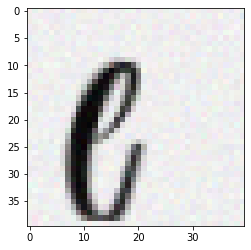

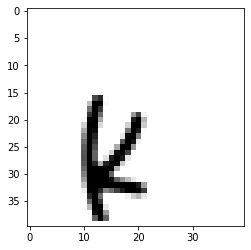

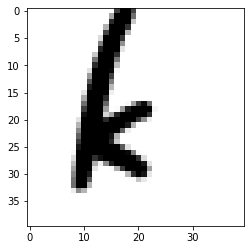

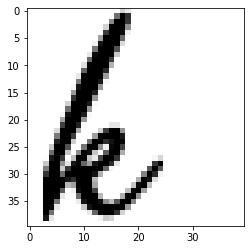

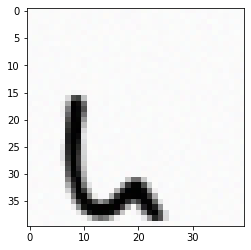

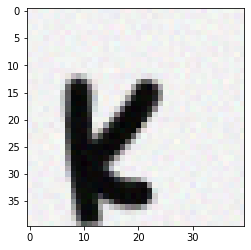

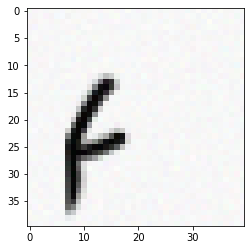

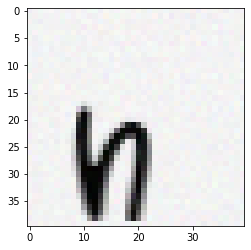

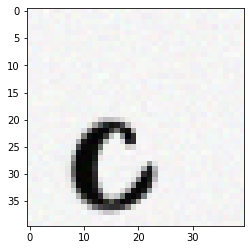

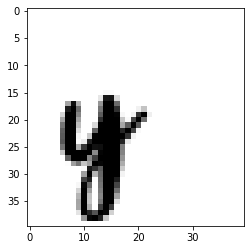

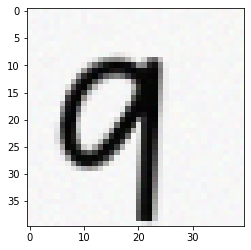

In [ ]:
def visualize_folder(folder):
    for root, dirs, files in os.walk(folder):
        i=0
        for name in files:
                if(i==5):
                    break
                i+=1
                img=cv2.imread(os.path.join(root, name))
                plt.figure()
                plt.imshow(img)
        break
visualize_folder(train_dir_path+'/'+random.choice(labels))
visualize_folder(validation_dir_path+'/'+random.choice(labels))
visualize_folder(test_dir_path)

# Build Model

---
Now build the model as per the best learning rate and dropout probability value determined earlier. Summarize and plot the model architecture.

---

**2 Points**

---




Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 512)               819712    
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 26)                13338     
Total params: 1,358,362
Trainable params: 1,358,362
Non-trainable params: 0
___________________________________________

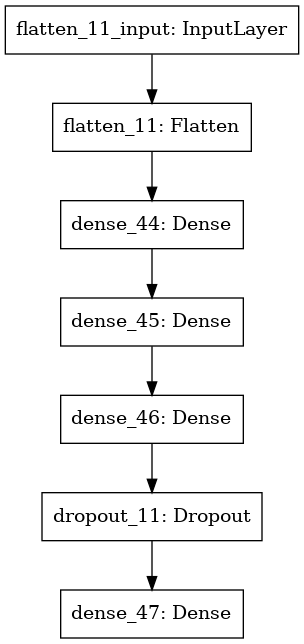

In [ ]:
# Insert your code here to build the model as per the best learning rate and dropout probability values determined earlier
model=build_model(dropout_probability=best_prob, LR=best_lr)

# Insert your code here to print the model summary
print(model.summary())

# Insert your code to plot the model architecture
tf.keras.utils.plot_model(
    model,
    to_file="model.png")

# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



In [ ]:
# Insert your code here to train the model with best hyperparameter settings using training set and validate using the validation set (1 Point)
h=model.fit(train_gen, validation_data=val_gen, epochs=num_epochs)


Epoch 1/40
1264/1264 [==============================] - 13s 10ms/step - loss: 2.5414 - categorical_accuracy: 0.2783 - val_loss: 1.4742 - val_categorical_accuracy: 0.6203
Epoch 2/40
1264/1264 [==============================] - 12s 10ms/step - loss: 1.1804 - categorical_accuracy: 0.6653 - val_loss: 0.8554 - val_categorical_accuracy: 0.7701
Epoch 3/40
1264/1264 [==============================] - 13s 10ms/step - loss: 0.6319 - categorical_accuracy: 0.8258 - val_loss: 0.5152 - val_categorical_accuracy: 0.8850
Epoch 4/40
1264/1264 [==============================] - 13s 10ms/step - loss: 0.3504 - categorical_accuracy: 0.9107 - val_loss: 0.2712 - val_categorical_accuracy: 0.9465
Epoch 5/40
1264/1264 [==============================] - 14s 11ms/step - loss: 0.2092 - categorical_accuracy: 0.9539 - val_loss: 0.2133 - val_categorical_accuracy: 0.9492
Epoch 6/40
1264/1264 [==============================] - 13s 10ms/step - loss: 0.1450 - categorical_accuracy: 0.9654 - val_loss: 0.1158 - val_categoric

In [ ]:
# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
training_acc=h.history['categorical_accuracy']
validation_acc=h.history['val_categorical_accuracy']
training_loss=h.history['loss']
validation_loss=h.history['val_loss']
epochs_list=list(range(num_epochs))

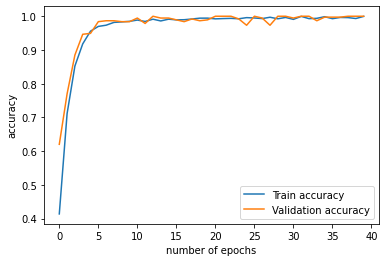

In [ ]:
# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.plot(epochs_list, training_acc)
plt.plot(epochs_list, validation_acc)
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend(["Train accuracy", "Validation accuracy"])

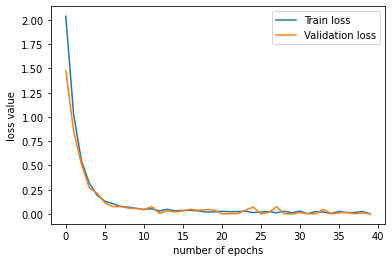

In [ ]:
# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.plot(epochs_list, training_loss)
plt.plot(epochs_list, validation_loss)
plt.xlabel("number of epochs")
plt.ylabel("loss value")
plt.legend(["Train loss", "Validation loss"])

# Prediction

---
Evaluate performance of model on the test sets.




---
**2 Points**

---





In [ ]:
# Insert your code here to get the model's performance with test set
model.evaluate(test_gen)

26/26 [==============================] - 0s 5ms/step - loss: 8.7616e-04 - categorical_accuracy: 1.0000


[0.0008761585340835154, 1.0]

# Observations

---
Write your observations from this experiment. Also, what would be your suggestions for increasing the performance of the model ?




---
**5 Points**

---


### Observations
We trained our model to fit on the given training dataset and evaluate the model based on the validation set accuracy. 
Then we chose the best hyperparameters from the given list so that our model has the least loss and highest validation accuracy. After we chose the best hyperparameters, then we train the model using those hyperparameters over 40 epochs and plot the epochs vs accuracy / epochs vs loss graphs. As expected the accuracy will increase with the increasing the number epochs and becomes stable around 40 epochs. Also the loss decreases while we increase the number of epochs. 

### Suggestions
As we can see that the model is already performing well on the test set also, there cannot be much steps to do in order to make the performance better. But in order to make the loss even smaller, we can take certain steps - 
1) **increasing the number of epochs** - we can increase the number of epochs to further reduce the categorical loss.

2) **exploring a greater range of the hyperparameter values** - we chose only few hyperparameters during our training. Perhaphs taking a greater range and then choosing the best hyperparameter out of that would be a better choice to further decrease the loss.